In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
from functools import lru_cache

In [2]:
username = "DublinBikesApp"
password = "dublinbikesapp"
endpoint = "dublinbikesapp.cynvsd3ef0ri.us-east-1.rds.amazonaws.com"
port = "3306"
db = "DublinBikesApp"

engine = create_engine("mysql+mysqlconnector://{}:{}@{}:{}/{}".format(username, password, endpoint, port, db), echo=False)

In [3]:
n= 41

sql =  f"""
SELECT number, last_update, avg(available_bike_stands), avg(available_bikes) FROM DublinBikesApp.dynamicData
where number = {n}
group by number, day(last_update)
order by number, last_update asc;
"""

print(sql)


SELECT number, last_update, avg(available_bike_stands), avg(available_bikes) FROM DublinBikesApp.dynamicData
where number = 41
group by number, day(last_update)
order by number, last_update asc;



In [4]:
df = pd.read_sql_query(sql, engine)

In [5]:
df

,number,last_update,avg(available_bike_stands),avg(available_bikes)
0,41,2021-03-01 01:07:26,11.7600,8.0655
1,41,2021-03-02 00:09:23,13.5903,6.2639
2,41,2021-03-03 00:09:50,15.5123,4.4877
3,41,2021-03-04 00:02:05,12.7083,7.2917
4,41,2021-03-05 00:02:50,11.2587,8.7413
5,41,2021-03-06 00:01:29,10.5382,9.4618
6,41,2021-03-07 00:01:41,17.1045,2.8955
7,41,2021-03-08 00:06:27,13.9615,5.7797
8,41,2021-03-09 00:00:17,9.2091,10.4634
9,41,2021-03-10 00:03:25,13.3554,6.6446


<AxesSubplot:xlabel='last_update'>

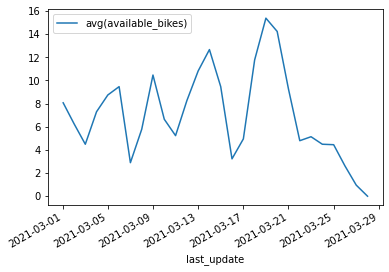

In [6]:
df.plot(x='last_update', y='avg(available_bikes)')

In [7]:
sql =  f"""
SELECT number, last_update, available_bike_stands, available_bikes FROM DublinBikesApp.dynamicData
where number = {n}
"""
df = pd.read_sql_query(sql, engine)

In [8]:
df

,number,last_update,available_bike_stands,available_bikes
0,41,2021-03-01 01:07:26,11,9
1,41,2021-03-01 01:17:33,11,9
2,41,2021-03-01 01:17:33,11,9
3,41,2021-03-01 01:17:33,11,9
4,41,2021-03-01 01:27:39,11,9
...,...,...,...,...
7741,41,2021-03-28 00:07:45,20,0
7742,41,2021-03-28 00:17:51,20,0
7743,41,2021-03-28 00:17:51,20,0
7744,41,2021-03-28 00:30:16,20,0


In [9]:
# res_df = df.set_index('last_update')
# res_df = res_df.resample('w').mean()
# res_df

In [25]:
df["last_update"] = pd.to_datetime(df["last_update"])

In [26]:
df["day"] = df["last_update"].dt.dayofweek

In [43]:
df["hour"] = df["last_update"].dt.hour
df

,number,last_update,available_bike_stands,available_bikes,day,hour
0,41,2021-03-01 01:07:26,11,9,0,1
1,41,2021-03-01 01:17:33,11,9,0,1
2,41,2021-03-01 01:17:33,11,9,0,1
3,41,2021-03-01 01:17:33,11,9,0,1
4,41,2021-03-01 01:27:39,11,9,0,1
...,...,...,...,...,...,...
7741,41,2021-03-28 00:07:45,20,0,6,0
7742,41,2021-03-28 00:17:51,20,0,6,0
7743,41,2021-03-28 00:17:51,20,0,6,0
7744,41,2021-03-28 00:30:16,20,0,6,0


In [112]:
newDF = pd.DataFrame(data = {"hours": [x for x in range(24)]})
for i,days in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
    day = []
    for hours in range(24):
       day.append(df.loc[(df["hour"] == hours) & (df["day"] == i)]['available_bike_stands'].mean())
    newDF[days] = day
newDF

,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,12.000000,14.500000,14.813953,14.086957,12.173913,9.577778,12.384615
1,1,11.653061,14.595745,15.060000,14.020408,12.000000,10.000000,11.000000
2,2,11.750000,14.500000,15.020408,14.000000,12.000000,10.000000,11.000000
3,3,11.851064,14.489796,15.065217,14.000000,12.000000,10.000000,11.000000
4,4,11.750000,14.521739,14.978723,14.022222,11.977778,10.000000,11.000000
5,5,11.782609,14.408163,14.918367,13.940000,11.920000,10.000000,11.000000
6,6,11.840000,14.653061,15.265306,14.000000,12.460000,9.750000,11.000000
7,7,12.020000,14.380000,15.224490,13.574468,12.354167,9.857143,11.405405
8,8,11.854167,11.212766,14.346939,12.083333,11.562500,10.140000,11.333333
9,9,11.958333,10.708333,14.468085,11.551020,9.791667,10.086957,11.555556


In [98]:

df["last_update"] = pd.to_datetime(df["last_update"])
res_df = df.groupby([df["last_update"].dt.dayofweek ])["available_bikes"].mean().reset_index()
add_df = df.groupby([df["last_update"].dt.dayofweek ])["available_bike_stands"].mean().reset_index()
res_df["available_bike_stands"] = add_df["available_bike_stands"]

res_df

,last_update,available_bikes,available_bike_stands
0,Friday,8.729330,12.877317
1,Monday,7.015004,13.553432
2,Saturday,8.870435,14.858014
3,Sunday,8.212226,12.757840
4,Thursday,7.186411,11.270670
5,Tuesday,6.266725,11.129565
6,Wednesday,5.141986,11.787774


In [ ]:
res_df2 = df.groupby([df["day"], "day" ])["available_bike_stands"].mean()

In [13]:
# res_df = df.set_index('last_update')
# res_df.groupby([res_df.index.day_name()])["available_bikes"].mean()

last_update
Friday       8.729330
Monday       7.015004
Saturday     9.284932
Sunday       8.269454
Thursday     7.186411
Tuesday      6.266725
Wednesday    5.141986
Name: available_bikes, dtype: float64

In [14]:
res_df = df.set_index('last_update')
res_df = res_df.groupby([res_df.index.day_name(), "number"])["available_bikes"].mean()

In [15]:
res_df

last_update  number
Friday       41        8.729330
Monday       41        7.015004
Saturday     41        9.284932
Sunday       41        8.269454
Thursday     41        7.186411
Tuesday      41        6.266725
Wednesday    41        5.141986
Name: available_bikes, dtype: float64

In [16]:
res_df = df.set_index('last_update').resample('1h').mean()
res_df

,number,available_bike_stands,available_bikes
last_update,,,
2021-03-01 01:00:00,41.0,11.000000,9.000000
2021-03-01 02:00:00,41.0,11.000000,9.000000
2021-03-01 03:00:00,41.0,11.000000,9.000000
2021-03-01 04:00:00,41.0,11.000000,9.000000
2021-03-01 05:00:00,41.0,11.000000,9.000000
...,...,...,...
2021-03-27 15:00:00,41.0,18.000000,2.000000
2021-03-27 16:00:00,41.0,19.000000,1.000000
2021-03-27 17:00:00,41.0,19.384615,0.615385


<AxesSubplot:xlabel='last_update'>

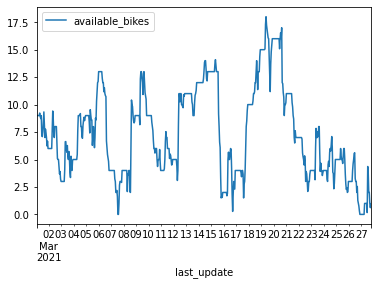

In [17]:
res_df.plot(y='available_bikes')

In [18]:
res_df['last_update'] = res_df.index
res_df.to_json(orient='records')

8800000},{"number":41.0,"available_bike_stands":4.0,"available_bikes":16.0,"last_update":1616162400000},{"number":41.0,"available_bike_stands":5.5,"available_bikes":14.5,"last_update":1616166000000},{"number":41.0,"available_bike_stands":6.75,"available_bikes":13.25,"last_update":1616169600000},{"number":41.0,"available_bike_stands":8.8181818182,"available_bikes":11.1818181818,"last_update":1616173200000},{"number":41.0,"available_bike_stands":6.3076923077,"available_bikes":13.6923076923,"last_update":1616176800000},{"number":41.0,"available_bike_stands":5.1818181818,"available_bikes":14.8181818182,"last_update":1616180400000},{"number":41.0,"available_bike_stands":4.5384615385,"available_bikes":15.4615384615,"last_update":1616184000000},{"number":41.0,"available_bike_stands":4.0,"available_bikes":16.0,"last_update":1616187600000},{"number":41.0,"available_bike_stands":4.0,"available_bikes":16.0,"last_update":1616191200000},{"number":41.0,"available_bike_stands":4.0,"available_bikes":1